**Brian Phelan**

*5 April 2018*

HW10

# Problem 3:

In [10]:
import sympy as sp               
import numpy as np               
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from __future__ import division

Given equation:

$\frac{dP}{d\Omega} = \frac{q^2}{16\pi^2\epsilon_0c}\frac{|a|^2}{1-\beta cos\theta}\Big[1-\frac{sin^2\theta cos^2\phi}{\gamma^2(1-\beta cos\theta)^2}\Big]$

We will show how the shape of the cross section ($\theta = 0$), changes as a function of $\beta$. This will show how the synchrotron radiation becomes more collimated as the electron approaches relativistic speeds.

In [41]:
A = 1
b1 = 0.15
g1 = 1/np.sqrt(1 - b1**2)

theta, phi = np.linspace(0, np.pi, 200), np.linspace(0, 2*np.pi, 200)
TH, PHI = np.meshgrid(theta, phi)

dP_dOm = A/(1 - b1*np.cos(TH))**3*(1 - (np.sin(TH)*np.cos(PHI))**2/(g1**2*(1 - b1*np.cos(TH))**2))

dif_speeds = []
for b in np.linspace(0, 0.99, 10):
    g = 1/np.sqrt(1 - b**2)
    dP_dOm_test = A/(1 - b*np.cos(phi))**3*(1 - (np.sin(phi)*np.cos(0))**2/(g**2*(1 - b*np.cos(phi))**2))
    dif_speeds.append(dP_dOm_test)

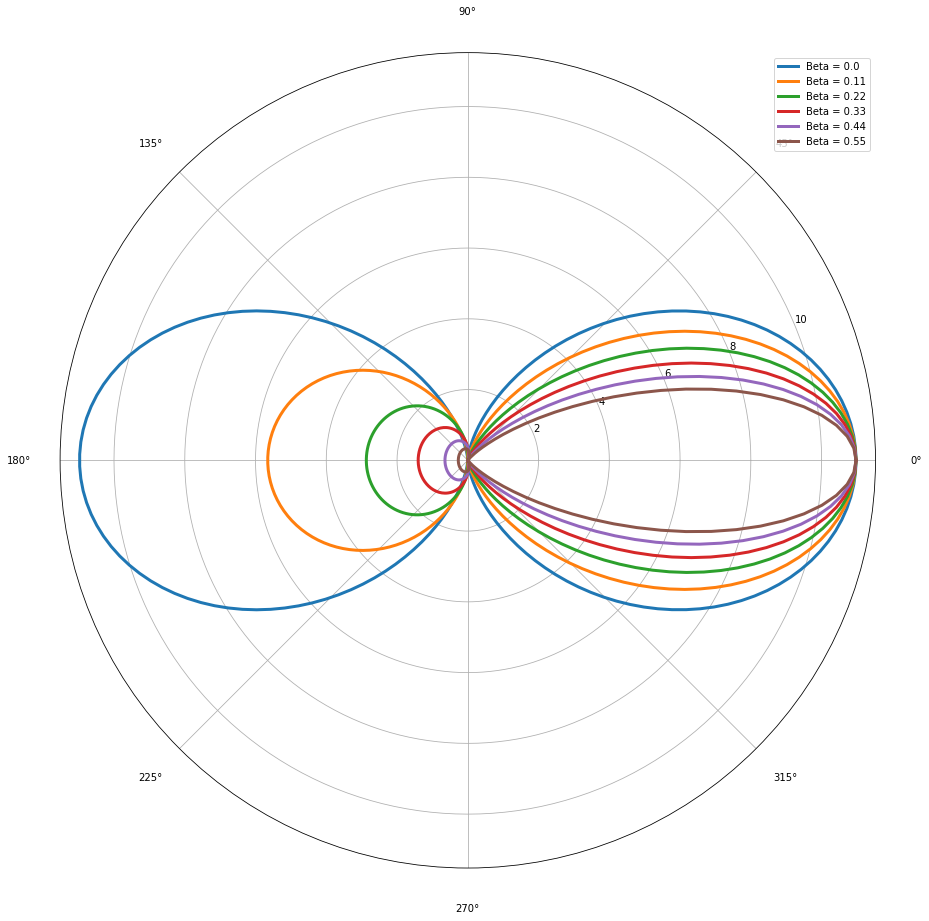

In [13]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1, projection='polar')
plot = ax.plot(phi, dif_speeds[0] * 10.974, linewidth=3.0, label='Beta = 0.0')
plot = ax.plot(phi, dif_speeds[1] * 7.734, linewidth=3.0, label='Beta = 0.11')
plot = ax.plot(phi, dif_speeds[2] * 5.208, linewidth=3.0, label='Beta = 0.22')
plot = ax.plot(phi, dif_speeds[3] * 3.300, linewidth=3.0, label='Beta = 0.33')
plot = ax.plot(phi, dif_speeds[4] * 1.927, linewidth=3.0, label='Beta = 0.44') 
plot = ax.plot(phi, dif_speeds[5] * 1.000, linewidth=3.0, label='Beta = 0.55')
plt.legend()
plt.show()

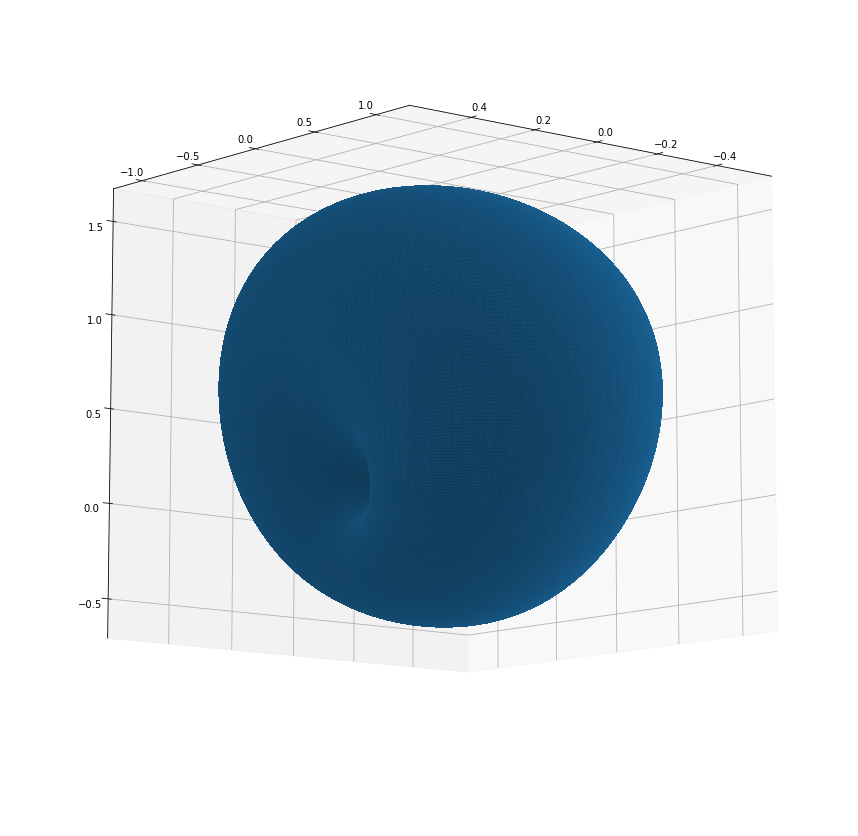

In [42]:
X3 = dP_dOm * np.sin(TH) * np.cos(PHI)
Y3 = dP_dOm * np.sin(TH) * np.sin(PHI)
Z3 = dP_dOm * np.cos(TH)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X3, Y3, Z3, rstride=1, cstride=1,
    linewidth=0, antialiased=False, alpha=0.9, shade=True)
ax.view_init(azim=50, elev=-10)
plt.show()

These two graphics show the angular distribution of the radiation power of an electron undergoing circular motion. In the polar plot, we can see that as the electron speed approaches the speed of light, the power radiated favors the direction of electron motion (to the right). The polar plots are scaled so that the maxima at $0\deg$ end up at the same point but in reality, the greater $\beta$, the greater the power radiated is at $0\deg$. The 3d plot shows the power radiated as a function of both the polar and azimuthal angles. I hope to add an animation to this plot that allows us to scroll through different values of $\beta$ and view the plot from different directions.